In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 7.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=c518ec7b375a6c1c66aaf92eb5c46c7d26a31a3347fa081166f880fd8cb6f0ac
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [21]:
fundos = ctrl.Antecedent(np.arange(0,101,1), 'Fundos do projeto')
funcionarios = ctrl.Antecedent(np.arange(0,101,1), 'Funcionários do projeto')
risco = ctrl.Consequent(np.arange(0,101,1), 'Risco do projeto')

fundos['inadequado'] = fuzz.trapmf(fundos.universe,[0,0,30,50]) #A1
fundos['razoável'] = fuzz.trimf(fundos.universe,[37.5,50,62.5])  #A2
fundos['adequado'] = fuzz.trapmf(fundos.universe,[50,70,100,100]) #A3 

funcionarios['pequeno'] = fuzz.trapmf(fundos.universe,[0,0,20,70]) #B1
funcionarios['grande'] = fuzz.trapmf(fundos.universe,[30,80,100,100]) #B2

risco['baixo'] = fuzz.trapmf(risco.universe,[0,0,20,40]) #C1
risco['normal'] = fuzz.trapmf(risco.universe,[25,45,55,80]) #C2
risco['alto'] = fuzz.trapmf(risco.universe,[50,70,100,100]) #C3

In [30]:
regra1 = ctrl.Rule(fundos['adequado'] | funcionarios['pequeno'],risco['baixo'])
regra2 = ctrl.Rule(fundos['razoável'] & funcionarios['grande'], risco['normal'])
regra3 = ctrl.Rule(fundos['inadequado'], risco['alto'])

In [31]:
risco_ctrl = ctrl.ControlSystem([regra1,regra2,regra3])
risco_simulador = ctrl.ControlSystemSimulation(risco_ctrl)

In [32]:
risco_simulador.input['Fundos do projeto'] = 39.5
risco_simulador.input['Funcionários do projeto'] = 65

risco_simulador.compute()
print(risco_simulador.output['Risco do projeto'])

66.83957743242165


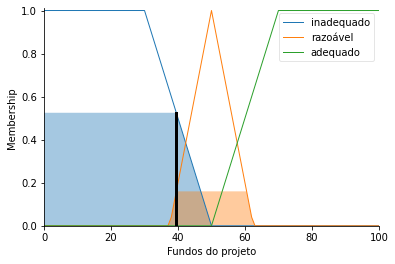

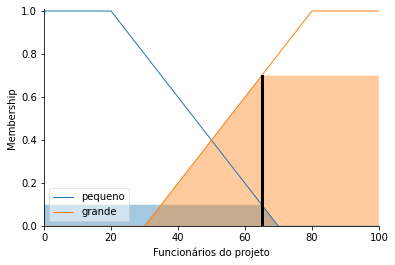

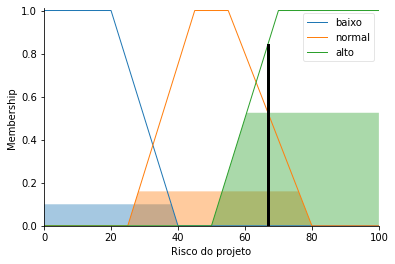

In [26]:
fundos.view(sim = risco_simulador)
funcionarios.view(sim = risco_simulador)
risco.view(sim = risco_simulador)

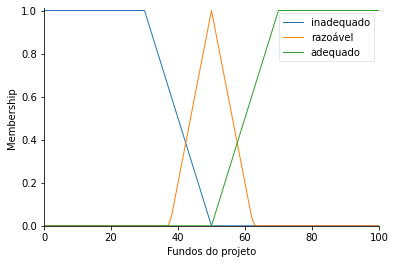

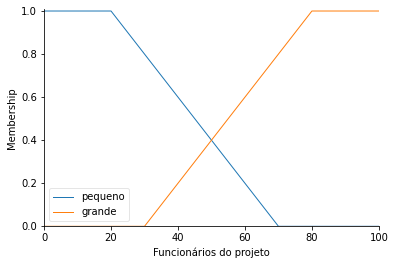

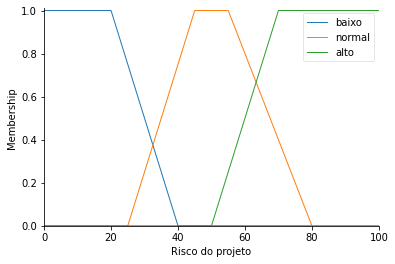

In [20]:
fundos.view()
funcionarios.view()
risco.view()